In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
#import xgboost as xgb
from sklearn.linear_model import LinearRegression 

data = pd.read_excel("灵性.xlsx")
data.head()
print(data.info())
features = ['序号', '年龄', '子女数量', '文化程度', '生活费用', '健康状况', '邻里关系', '子女关系', '心理状况', '灵性寄托']
new_data = data[features]
new_data.head()
# 查看每个column缺失值总数和百分比
total = new_data.isnull().sum().sort_values(ascending=False)
percent = (new_data.isnull().sum()/new_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
train_data = new_data.fillna(new_data.median())
train_data = train_data.astype(int)
train_data.info()
for indexs in train_data.index:
    #print(train_data.iloc[indexs]['子女关系'])
    if(train_data.iloc[indexs]['子女关系'] == 41):
        train_data.iloc[indexs]['子女关系'] = train_data['子女关系'].median()
        
for indexs in train_data.index:
    #print(train_data.iloc[indexs]['子女关系'])
    if(train_data.iloc[indexs]['子女数量'] == 11):
        train_data.iloc[indexs]['子女数量'] = train_data['子女数量'].median()
        
print(train_data['子女数量'].unique())
print(train_data['文化程度'].unique())
print(train_data['生活费用'].unique())
print(train_data['健康状况'].unique())
print(train_data['邻里关系'].unique())
print(train_data['子女关系'].unique())
print(train_data['心理状况'].unique())
print(train_data['灵性寄托'].unique())

# 查看每个column缺失值总数和百分比
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

# 用corr()计算出各列与'灵性寄托'的相关性
traindata_corr = train_data.corr()['灵性寄托'][:-1]
golden_feature_list = traindata_corr[abs(traindata_corr) > 0].sort_values(ascending = False)
print("Below are {} correlated values with 灵性寄托:\n{}".format(len(golden_feature_list), golden_feature_list))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 24 columns):
序号             945 non-null int64
年龄             945 non-null int64
子女数量           943 non-null float64
文化程度           945 non-null int64
生活费用           943 non-null float64
健康状况           945 non-null int64
邻里关系           943 non-null float64
子女关系           901 non-null float64
心理状况           945 non-null int64
Unnamed: 9     945 non-null int64
Unnamed: 10    945 non-null int64
Unnamed: 11    945 non-null int64
Unnamed: 12    945 non-null int64
Unnamed: 13    0 non-null float64
Unnamed: 14    945 non-null int64
Unnamed: 15    945 non-null int64
Unnamed: 16    945 non-null int64
Unnamed: 17    945 non-null int64
Unnamed: 18    945 non-null int64
Unnamed: 19    945 non-null int64
Unnamed: 20    945 non-null int64
Unnamed: 21    0 non-null float64
Unnamed: 22    0 non-null float64
灵性寄托           945 non-null int64
dtypes: float64(7), int64(17)
memory usage: 177.3 KB
None
<class 'panda

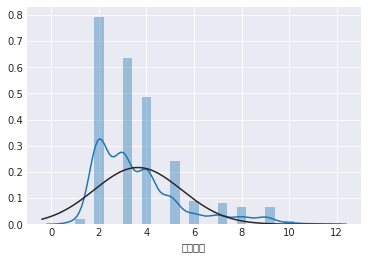

In [27]:
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from scipy import stats
from scipy.stats import norm, skew

sns.distplot(train_data['灵性寄托'],fit=norm)

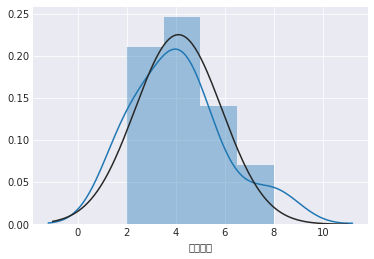

In [28]:
data = train_data[train_data['子女数量'] == 0]
data = train_data[train_data['心理状况'] == 4]
data
#data = train_data[train_data['生活费用'] == 5]
#data = train_data[train_data['邻里关系'] == 4]
#data = train_data[train_data['健康状况'] == 4]
#data
sns.distplot(data['灵性寄托'],fit=norm)

In [29]:
train_data.to_excel('修改版灵性.xlsx', index=False)

In [40]:
data = train_data[train_data['比例'] == 0.4]
data

,序号,年龄,子女数量,文化程度,生活费用,健康状况,邻里关系,子女关系,心理状况,灵性寄托,比例
95,111,60,0,2,0,2,0,0,0,2,0.4


In [31]:
#首先修改子女数量为0的其中子女关系必为0
#生活费用和健康状况成一定的正比
#邻里关系和心理状况成一定的正比
for indexs in train_data.index:
    if train_data.iloc[indexs]['子女数量'] == 0:
        train_data.iloc[indexs]['子女关系'] = 0
data

,序号,年龄,子女数量,文化程度,生活费用,健康状况,邻里关系,子女关系,心理状况,灵性寄托
45,56,75,6,2,2,3,2,2,1,2
74,89,75,1,1,5,2,2,4,3,3
87,103,75,4,1,4,3,3,3,2,3
120,139,75,3,1,5,3,3,2,3,4
132,156,75,5,1,2,2,3,4,2,2
135,159,75,6,1,4,3,2,3,1,4
174,198,75,4,1,3,3,3,4,2,9
183,207,75,3,1,4,3,2,4,2,5
214,238,75,4,1,4,2,3,4,2,2
229,253,75,5,1,2,3,3,4,1,5


In [32]:
print(train_data['年龄'].unique())
print(train_data['子女数量'].unique())
print(train_data['文化程度'].unique())
print(train_data['生活费用'].unique())
print(train_data['健康状况'].unique())
print(train_data['邻里关系'].unique())
print(train_data['子女关系'].unique())
print(train_data['心理状况'].unique())
print(train_data['灵性寄托'].unique())

[60 78 65 61 72 67 68 63 69 64 62 70 66 76 88 81 77 75 73 79 71 74 80 83 84
 87 85 86 82 90 89 91 92 95]
[1 3 2 0 4 5 6 7]
[1 2 3 5 4 0]
[3 2 4 5 1 0]
[2 3 1 0 4]
[3 2 0 1 4 5]
[4 3 2 0 5 1]
[2 3 1 0 4]
[ 2  4  3  6  5 10  1  7  8  9 11]


In [33]:
#解决方法还是设置比例，修改灵性寄托数据，包含年龄，仔细一想，年龄还是算了吧


In [34]:
# 用corr()计算出各列与'灵性寄托'的相关性
traindata_corr = train_data.corr()['灵性寄托'][:-1]
golden_feature_list = traindata_corr[abs(traindata_corr) > 0].sort_values(ascending = False)
print("Below are {} correlated values with 灵性寄托:\n{}".format(len(golden_feature_list), golden_feature_list))

Below are 9 correlated values with 灵性寄托:
心理状况    0.133859
邻里关系    0.091210
健康状况    0.083529
年龄      0.017021
生活费用   -0.002628
子女数量   -0.003859
序号     -0.009964
子女关系   -0.077464
文化程度   -0.189216
Name: 灵性寄托, dtype: float64


In [ ]:
#0.25 0.15 0.15 0.15 0.1 0.05 0.05 
for indexs in train_data.index:
    if train_data.iloc[indexs]['子女数量'] * 0.5 + :
        train_data.iloc[indexs]['子女关系'] = 0

In [37]:
train_data['比例'] = train_data['心理状况'] * 0.25 + train_data['邻里关系'] * 0.15 + \
train_data['健康状况'] * 0.15 + train_data['子女关系'] * 0.15 + train_data['生活费用'] * 0.1 + \
train_data['文化程度'] * 0.05 + train_data['子女数量'] * 0.05

In [38]:
train_data

,序号,年龄,子女数量,文化程度,生活费用,健康状况,邻里关系,子女关系,心理状况,灵性寄托,比例
0,1,60,1,1,3,2,3,4,2,2,2.25
1,2,78,3,1,3,2,3,3,3,2,2.45
2,3,60,1,2,2,2,3,4,2,4,2.20
3,4,65,2,3,2,2,2,2,2,3,1.85
4,5,61,1,2,2,3,3,4,2,3,2.35
5,6,60,0,5,3,1,2,0,1,2,1.25
6,8,65,1,4,3,2,2,4,2,6,2.25
7,11,72,2,2,3,2,3,4,2,2,2.35
8,12,65,2,1,3,3,2,5,2,2,2.45
9,13,67,1,4,3,2,2,4,1,2,2.00


In [39]:
print(train_data['比例'].unique())

[ 2.25  2.45  2.2   1.85  2.35  1.25  2.35  2.    1.95  1.7   1.9   1.8
  2.3   1.75  1.3   1.85  1.85  1.95  1.9   1.95  1.15  2.1   1.15  1.5
  1.45  1.1   1.7   1.55  2.15  2.2   2.55  2.45  2.3   2.35  0.9   0.95
  2.4   2.1   2.3   1.65  1.8   1.65  2.05  2.55  2.4   2.6   2.6   2.5   3.
  2.05  0.4   1.9   2.7   2.5   2.65  2.15  1.2   2.85  1.6   2.75  3.1
  2.9   2.9   2.75  2.8   3.1   2.65  3.    2.95  2.8   3.05  3.15  2.65
  3.2   2.6   2.4   1.55  3.05  1.65  2.5   2.9   2.15  2.7   2.25  2.6
  1.7   2.7   1.8   1.6   1.4   1.6   1.75  2.    1.35  1.2   1.35  1.55
  2.25  2.8   1.5   2.95  1.75  0.8   0.85  2.    1.    1.45  1.75  1.4 ]


In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
#import xgboost as xgb
from sklearn.linear_model import LinearRegression 

data = pd.read_excel("修改版灵性.xlsx")
data.head()
print(data['灵性寄托'].unique())

[ 2  4  3  6  5 10  1  7  8  9 11]


In [4]:
print(data['比例'].unique())

[  4.50000000e-01   1.05000000e+00   3.50000000e-01   7.50000000e-01
   6.00000000e-01   6.00000000e-01   2.00000000e-01   4.00000000e-01
  -5.00000000e-02   4.50000000e-01   8.00000000e-01   1.00000000e+00
  -5.00000000e-01   5.00000000e-01  -2.50000000e-01   9.00000000e-01
  -5.50000000e-01   3.00000000e-01  -2.00000000e-01   1.30000000e+00
   2.50000000e-01  -4.16333634e-17   5.50000000e-01   7.00000000e-01
  -1.50000000e-01   1.10000000e+00   6.50000000e-01   1.20000000e+00
  -2.00000000e-01   5.00000000e-01   9.50000000e-01   7.50000000e-01
   8.50000000e-01   1.00000000e+00   3.00000000e-01   1.00000000e-01
   1.50000000e-01   2.50000000e-01   1.50000000e-01  -1.00000000e-01
   9.50000000e-01   1.50000000e+00  -4.00000000e-01   5.00000000e-02
   9.71445147e-17   1.65000000e+00   1.55000000e+00   1.15000000e+00
   1.90000000e+00   1.25000000e+00  -5.00000000e-02   9.00000000e-01
  -2.50000000e-01  -3.00000000e-01   1.40000000e+00   8.50000000e-01
   1.35000000e+00   1.60000000e+00

In [26]:
#data[data['比例'] < 1].loc['灵性寄托'] = 1
dt = data[data['比例'] <= 22].loc[data['比例'] >= 1.6]
dt
#print(data['灵性寄托'].unique())

,序号,年龄,子女数量,文化程度,生活费用,健康状况,邻里关系,子女关系,心理状况,灵性寄托,比例
85,101,67,4,1,4,3,3,2,3,3,1.65
88,104,71,0,1,5,3,2,0,3,2,1.90
111,129,61,2,1,5,3,3,2,3,2,1.60
120,139,75,3,1,5,3,3,2,3,4,1.65
157,181,84,5,1,4,4,4,3,3,7,1.80
162,186,87,3,1,4,4,4,3,3,5,1.70
184,208,68,0,1,4,3,3,0,2,6,1.70
188,212,70,3,1,4,4,4,2,4,4,2.20
190,214,71,1,1,4,4,4,2,4,4,2.10
196,220,72,2,1,5,4,1,1,4,8,2.15


In [74]:
dt = data[data['灵性寄托'] > 10]
data.shape

(945, 11)

In [120]:
#import sys
#new_data = data.copy()
#temp = data['灵性寄托']
#print(temp)

for indexs in data.index:
    if data.iloc[indexs]['比例'] > 3:
        data.loc[indexs, '灵性寄托'] = 11
        #print(indexs)
    if data.iloc[indexs]['比例'] < 1:
        data.loc[indexs, '灵性寄托'] = 1
    
    if data['比例'][indexs] >= 1 and data['比例'][indexs] < 1.4:
        data.loc[indexs, '灵性寄托'] = 2
        
    if data['比例'][indexs] >= 1.4 and data['比例'][indexs] < 1.7:
        data.loc[indexs, '灵性寄托'] = 3
        
    if data['比例'][indexs] >= 1.7 and data['比例'][indexs] < 1.9:
        data.loc[indexs, '灵性寄托'] = 4
        
    if data['比例'][indexs] >= 1.9 and data['比例'][indexs] < 2.1:
        data.loc[indexs, '灵性寄托'] = 5
         
    if data['比例'][indexs] >= 2.1 and data['比例'][indexs] < 2.3:
        data.loc[indexs, '灵性寄托'] = 6
        
    if data['比例'][indexs] >= 2.3 and data['比例'][indexs] < 2.45:
        data.loc[indexs, '灵性寄托'] = 7
    
    if data['比例'][indexs] >= 2.45 and data['比例'][indexs] < 2.6:
        data.loc[indexs, '灵性寄托'] = 8
        
    if data['比例'][indexs] >= 2.6 and data['比例'][indexs] < 2.8:
        data.loc[indexs, '灵性寄托'] = 9
        
    if data['比例'][indexs] >= 2.8 and data['比例'][indexs] <= 3:
        data.loc[indexs, '灵性寄托'] = 10

In [121]:
# 用corr()计算出各列与'灵性寄托'的相关性
traindata_corr = data.corr()['灵性寄托'][:-2]
golden_feature_list = traindata_corr[abs(traindata_corr) > 0].sort_values(ascending = False)
print("Below are {} correlated values with 灵性寄托:\n{}".format(len(golden_feature_list), golden_feature_list))

Below are 9 correlated values with 灵性寄托:
心理状况    0.538453
健康状况    0.525571
邻里关系    0.484795
生活费用    0.480367
子女关系    0.389150
子女数量    0.384157
年龄      0.114683
文化程度   -0.072721
序号     -0.161020
Name: 灵性寄托, dtype: float64


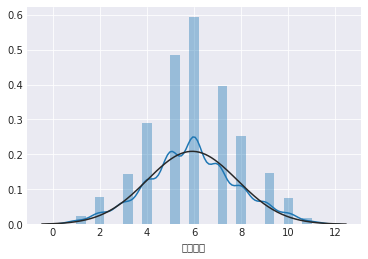

In [122]:
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from scipy import stats
from scipy.stats import norm, skew

sns.distplot(data['灵性寄托'],fit=norm)